### 1. Problem Definition

The goal is to create a predictive model that can accurately estimate house sale prices using a set of independent features.

### 2. Evaluation

The predictive model's performance will be evaluated based on its ability to accurately estimate house sale prices. Since this is a regression task, the evaluation metric commonly used is the Root Mean Squared Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. Mathematically, RMSE is defined as:

> ***RMSE = √(1/n * Σ(log(y_pred,i) - log(y_true,i))^2)***

Where:
- ***n is the number of observations.***
- ***y_pred,i is the predicted sale price for the i-th observation.***
- ***y_true,i is the true sale price for the i-th observation.***

The lower the RMSE value, the better the performance of the predictive model.

Alternatively, if outliers are detected in the dataset, we will use the Mean Absolute Error (MAE) as the evaluation metric. MAE is less sensitive to outliers compared to RMSE, making it a better choice in such cases. Mathematically, MAE is defined as:

> ***MAE = 1/n * Σ|y_pred,i - y_true,i|***

Both RMSE and MAE are important metrics for evaluating the predictive model's performance, with each being chosen based on the characteristics of the dataset.


### 3. Features Overview

- **SalePrice**: The property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The type of dwelling involved in the sale
- **MSZoning**: The general zoning classification of the property
- **LotFrontage**: The linear feet of street connected to the property
- **LotArea**: The size of the lot in square feet
- **Street**: The type of road access to the property
- **Alley**: The type of alley access to the property
- **LotShape**: The general shape of the property
- **LandContour**: The flatness of the property
- **Utilities**: The type of utilities available
- **LotConfig**: The configuration of the lot
- **LandSlope**: The slope of the property
- **Neighborhood**: The physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: The type of dwelling
- **HouseStyle**: The style of dwelling
- **OverallQual**: The overall material and finish quality
- **OverallCond**: The overall condition rating
- **YearBuilt**: The original construction date
- **YearRemodAdd**: The remodel date
- **RoofStyle**: The type of roof
- **RoofMatl**: The roof material
- **Exterior1st**: The exterior covering on the house
- **Exterior2nd**: The exterior covering on the house (if more than one material)
- **MasVnrType**: The masonry veneer type
- **MasVnrArea**: The masonry veneer area in square feet
- **ExterQual**: The exterior material quality
- **ExterCond**: The present condition of the material on the exterior
- **Foundation**: The type of foundation
- **BsmtQual**: The height of the basement
- **BsmtCond**: The general condition of the basement
- **BsmtExposure**: The walkout or garden level basement walls
- **BsmtFinType1**: The quality of basement finished area
- **BsmtFinSF1**: The type 1 finished square feet
- **BsmtFinType2**: The quality of the second finished area (if present)
- **BsmtFinSF2**: The type 2 finished square feet
- **BsmtUnfSF**: The unfinished square feet of basement area
- **TotalBsmtSF**: The total square feet of the basement area
- **Heating**: The type of heating
- **HeatingQC**: The heating quality and condition
- **CentralAir**: Whether the house has central air conditioning
- **Electrical**: The electrical system
- **1stFlrSF**: The first-floor square feet
- **2ndFlrSF**: The second-floor square feet
- **LowQualFinSF**: The low-quality finished square feet (all floors)
- **GrLivArea**: The above grade (ground) living area square feet
- **BsmtFullBath**: The number of basement full bathrooms
- **BsmtHalfBath**: The number of basement half bathrooms
- **FullBath**: The number of full bathrooms above grade
- **HalfBath**: The number of half baths above grade
- **Bedroom**: The number of bedrooms above basement level
- **Kitchen**: The number of kitchens
- **KitchenQual**: The kitchen quality
- **TotRmsAbvGrd**: The total rooms above grade (does not include bathrooms)
- **Functional**: The home functionality rating
- **Fireplaces**: The number of fireplaces
- **FireplaceQu**: The fireplace quality
- **GarageType**: The garage location
- **GarageYrBlt**: The year the garage was built
- **GarageFinish**: The interior finish of the garage
- **GarageCars**: The size of the garage in car capacity
- **GarageArea**: The size of the garage in square feet
- **GarageQual**: The garage quality
- **GarageCond**: The garage condition
- **PavedDrive**: The paved driveway
- **WoodDeckSF**: The wood deck area in square feet
- **OpenPorchSF**: The open porch area in square feet
- **EnclosedPorch**: The enclosed porch area in square feet
- **3SsnPorch**: The three-season porch area in square feet
- **ScreenPorch**: The screen porch area in square feet
- **PoolArea**: The pool area in square feet
- **PoolQC**: The pool quality
- **Fence**: The fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: The value of miscellaneous feature
- **MoSold**: The month sold
- **YrSold**: The year sold
- **SaleType**: The type of sale
- **SaleCondition**: The condition of sale

These features provide information about various aspects of the properties, which will be used to predict the sale prices accurately.


### 4. Modelling

1. ***Random Forest Regression***
2. ***XGBoost***
3. ***CatBoost***sed to predict the sale prices accurately.

5. Modelling
Random Forest Regression
XGBoost
CatBoost


## Preparing the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import catboost
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer


from joblib import dump, load

In [4]:
df=pd.read_csv('House.csv')

In [5]:
df.shape      # Displays no of rows and columns in dataset

(1460, 81)

In [6]:
df.head()    # Head function displays 1st 5 records of data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
data.describe() # If gives summary of numerical features which consists of central tendencies like mean , median , mode , no of records , range

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Houses are built between 1872 - 2010 and start remodeling from 1950

LotArea of houses ranges from 1300 to 215245

Houses have avg basement area of 1057 sqft, avg ground living area of 1515 sqft, bathroom of 1.56 sqft , bedroom of 
avg 2.86 sqft, kitchen of 1.04 sqft

Houses have on an avg 6 rooms, min 2 rooms and max 14 rooms.

No of cars each house has ranges from 0-4 and garage area of 472 sqft

Some houses even has pool with avg area of 2.7 sqft

In [9]:
data.describe(include='O')    #It gives summary of categorical features consisiting of mode, frequency.

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


There are in total 8 different types of housing styles.

AllPub, NoSeWa are 2 types of utilies available for houses.

There are 25 different categories of facilities available in neighborhood.

Sale condition are of 6 types like Normal, Abnorml, Partial, AdjLand, Alloca, Family with Normal being the most.

In [10]:
def categorical_features(data):
    """
    Identify categorical features in the given dataset.

    Parameters:
    data (DataFrame): The input dataset containing features.

    Returns:
    list: A list of column names corresponding to categorical features 
          with unique values less than or equal to 26.
    """
    categorical_features = []
    for feature in data.columns:
        # Check if the number of unique values in the feature is less than or equal to 26
        if data[feature].nunique() <= 26:
            categorical_features.append(feature)  # Add the feature to the list of categorical features
    return categorical_features

In [11]:
def numerical_features(data):
    """
    Identify numerical features in the given dataset.

    Parameters:
    data (DataFrame): The input dataset containing features.

    Returns:
    list: A list of column names corresponding to numerical features 
          with unique values greater than 26.
    """
    numerical_features = []
    for feature in data.columns:
        # Check if the number of unique values in the feature is greater than 26
        if data[feature].nunique() > 26:
            numerical_features.append(feature)  # Add the feature to the list of numerical features
    return numerical_features

In [12]:
categorical_features(data)

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [13]:
numerical_features(data)

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

Houses are built between 1872 - 2010 and start remodeling from 1950

LotArea of houses ranges from 1300 to 215245

Houses have avg basement area of 1057 sqft, avg ground living area of 1515 sqft, bathroom of 1.56 sqft , bedroom of 
avg 2.86 sqft, kitchen of 1.04 sqft

Houses have on an avg 6 rooms, min 2 rooms and max 14 rooms.

No of cars each house has ranges from 0-4 and garage area of 472 sqft

Some houses even has pool with avg area of 2.7 sqft

In [14]:
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


There are in total 8 different types of housing styles.

AllPub, NoSeWa are 2 types of utilies available for houses.

There are 25 different categories of facilities available in neighborhood.

Sale condition are of 6 types like Normal, Abnorml, Partial, AdjLand, Alloca, Family with Normal being the most.


In [15]:
data.drop('Id', axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [16]:
for i, feature in enumerate(categorical_features(data)):
    missing_data = data[feature].isna().sum()
    if missing_data:
        print(f"{feature} : {data[feature].isna().sum()}")

Alley : 1369
MasVnrType : 872
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


In [17]:
def cat_drop_missing_data(data):
    """
    Drop categorical features with a high percentage of missing data.

    Parameters:
    data (DataFrame): The input dataset containing categorical features.

    Returns:
    DataFrame: The modified dataset with categorical features removed if they have
               a percentage of missing data greater than 730.
    """
    for feature in categorical_features(data):  # Iterate through categorical features
        missing_data = data[feature].isna().sum()  # Count missing data for the feature
        if missing_data > 730:  # Check if percentage of missing data is greater than 730
            data.drop(feature, axis=1, inplace=True)  # Drop the feature
    return data

In [18]:
cat_drop_missing_data(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [19]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [20]:
for i, feature in enumerate(categorical_features(data)):
    missing_data = data[feature].isna().sum()
    if missing_data:
        print(f"{feature} : {data[feature].isna().sum()}")

BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81


In [21]:
def cat_fill_missing_data(data):
    """
    Fill missing values in categorical features with 'missing'.

    Parameters:
    data (DataFrame): The input dataset containing categorical features.

    Returns:
    DataFrame: The modified dataset with missing values in categorical features
               replaced by 'missing'.
    """
    for feature in categorical_features(data):  # Iterate through categorical features
        missing_data = data[feature].isna().sum()  # Count missing data for the feature
        if missing_data > 0:  # Check if missing data exists
            data[feature] = data[feature].fillna('missing')  # Fill missing values with 'missing'
    return data

In [22]:
cat_fill_missing_data(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [23]:
for i, feature in enumerate(categorical_features(data)):
    missing_data = data[feature].isna().sum()
    if missing_data:
        print(f"{feature} : {data[feature].isna().sum()}")

In [24]:
for i, feature in enumerate(numerical_features(data)):
    missing_data = data[feature].isna().sum()
    if missing_data:
        print(f"{feature} : {data[feature].isna().sum()}")

LotFrontage : 259
MasVnrArea : 8
GarageYrBlt : 81


In [25]:
def num_fill_missing_data(data):
    """
    Fill missing values in numerical features with the median of each feature.

    Parameters:
    data (DataFrame): The input dataset containing numerical features.

    Returns:
    DataFrame: The modified dataset with missing values in numerical features
               replaced by the median of each feature.
    """
    for feature in numerical_features(data):  # Iterate through numerical features
        missing_data = data[feature].isna().sum()  # Count missing data for the feature
        if missing_data > 0:  # Check if missing data exists
            data[feature] = data[feature].fillna(data[feature].median())  # Fill missing values with median
    return data

In [26]:
num_fill_missing_data(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [28]:
for i, feature in enumerate(numerical_features(data)):
    missing_data = data[feature].isna().sum()
    if missing_data:
        print(f"{feature} : {data[feature].isna().sum()}")

In [29]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [30]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
def include_age(data):
    """
    Add a new feature 'Age' representing the age of the property at the time of sale.

    Parameters:
    data (DataFrame): The input dataset containing 'YrSold' and 'YearBuilt' features.

    Returns:
    DataFrame: The modified dataset with the new 'Age' feature added and 'YrSold' and 'YearBuilt' columns dropped.
    """
    # Calculate the age of the property
    data['Age'] = data['YrSold'] - data['YearBuilt']
    
    # Drop 'YrSold' and 'YearBuilt' columns if they exist
    if 'Age' in data.columns:
        data.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
    
    return data

In [32]:
include_age(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,WD,Normal,175000,8
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,WD,Normal,210000,32
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,WD,Normal,266500,69
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,WD,Normal,142125,60


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [34]:
categorical_features(data)  

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

## Feature Importance Analysis and One-Hot Encoding

1. **Objective:**
   - The objective of this analysis is to identify the top 20 important features using a Random Forest Regressor and subsequently apply one-hot encoding to these features.

2. **Approach:**
   - Initially, a copy of the dataset `data` is created as `data_copy` to preserve the original dataset.
   - Next, a temporary `LabelEncoder` is instantiated to encode categorical features.
   - Categorical features in the `data_copy` are then fitted and transformed using the `LabelEncoder`.
   - A Random Forest Regressor is trained using the transformed dataset (`data_copy`) to determine feature importances.
   - The feature importances are sorted in descending order to identify the top 20 features.
   - Finally, a bar plot is generated to visualize the top 20 feature importances, and the identified top features are listed.

3. **Observations:**
   - The identified top 20 features are crucial for understanding their importance in predicting the target variable (`SalePrice`).
   - One-hot encoding can be applied to these top features to handle categorical data effectively.

4. **Conclusion:**
   - Feature importance analysis provides valuable insights into the dataset, aiding in feature selection and model performance optimization.
   - Applying one-hot encoding to categorical features enhances the model's ability to capture complex relationships within the data.

In [35]:
data_copy = data.copy()

In [36]:
categorical_features(data_copy)

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [37]:
categorical_features(data)

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [38]:
# Instantiate LabelEncoder
temp_label_encoder = LabelEncoder()

# Fit and transform categorical features in the training data
for feature in categorical_features(data_copy):
    data_copy[feature] = temp_label_encoder.fit_transform(data_copy[feature])

In [39]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

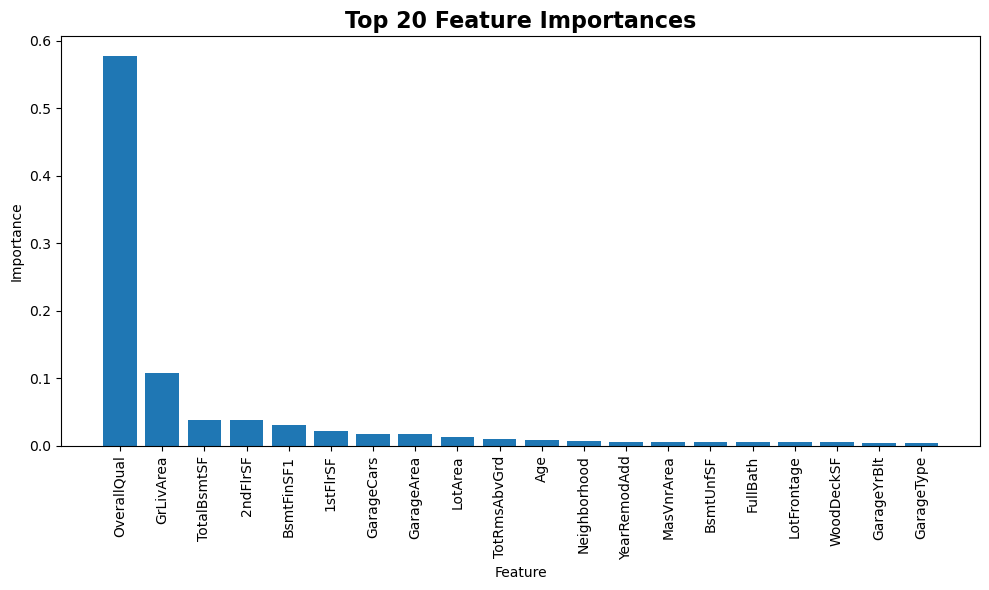

In [40]:
# Train a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=5)
rf_regressor.fit(data_copy.drop('SalePrice', axis=1), data['SalePrice'])

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot only the top 5 feature importances
top_n = 20  # Number of top features to display
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[sorted_indices][:top_n], align='center')
plt.xticks(range(top_n), [data_copy.drop('SalePrice', axis=1).columns[i] for i in sorted_indices][:top_n], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importances', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [41]:
top20 = [data_copy.drop('SalePrice', axis=1).columns[i] for i in sorted_indices][:20]
top20

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'GarageCars',
 'GarageArea',
 'LotArea',
 'TotRmsAbvGrd',
 'Age',
 'Neighborhood',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtUnfSF',
 'FullBath',
 'LotFrontage',
 'WoodDeckSF',
 'GarageYrBlt',
 'GarageType']

Text(171.72222222222234, 0.5, 'Features')

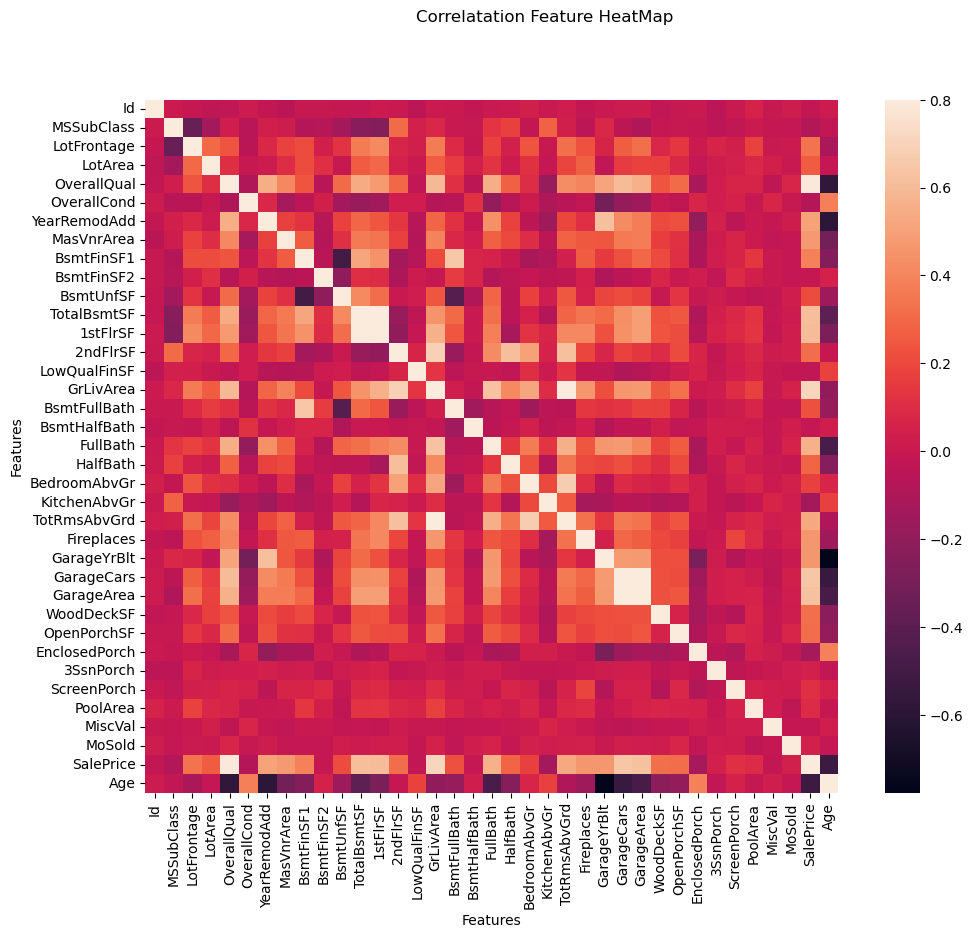

In [42]:
#correlation matrix
corr_mat = data.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

OverallQual and BsmtFinSF1 seem to be the most correlated to SalePrice

In [43]:
def select_columns(empty_df, original_data, top_features, target_column=None):
    """
    Select specified columns from the original dataset and append them to a new DataFrame.

    Parameters:
    empty_df (DataFrame): An empty DataFrame to store the selected columns.
    original_data (DataFrame): The original dataset.
    top_features (list): A list of top features to select.
    target_column (str or None): The name of the target column. Default is None.

    Returns:
    DataFrame: The updated DataFrame with selected columns.
    """
    # Iterate through each top feature and copy it to the empty DataFrame
    for feature in top_features:
        empty_df[feature] = original_data[feature]

    # If target column is specified, copy it to the empty DataFrame
    if target_column:
        empty_df[target_column] = original_data[target_column]

    return empty_df

In [44]:
updated_data = pd.DataFrame()
select_columns(updated_data, data, top20, 'SalePrice')

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,GarageCars,GarageArea,LotArea,TotRmsAbvGrd,...,Neighborhood,YearRemodAdd,MasVnrArea,BsmtUnfSF,FullBath,LotFrontage,WoodDeckSF,GarageYrBlt,GarageType,SalePrice
0,7,1710,856,854,706,856,2,548,8450,8,...,CollgCr,2003,196.0,150,2,65.0,0,2003.0,Attchd,208500
1,6,1262,1262,0,978,1262,2,460,9600,6,...,Veenker,1976,0.0,284,2,80.0,298,1976.0,Attchd,181500
2,7,1786,920,866,486,920,2,608,11250,6,...,CollgCr,2002,162.0,434,2,68.0,0,2001.0,Attchd,223500
3,7,1717,756,756,216,961,3,642,9550,7,...,Crawfor,1970,0.0,540,1,60.0,0,1998.0,Detchd,140000
4,8,2198,1145,1053,655,1145,3,836,14260,9,...,NoRidge,2000,350.0,490,2,84.0,192,2000.0,Attchd,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953,694,0,953,2,460,7917,7,...,Gilbert,2000,0.0,953,2,62.0,0,1999.0,Attchd,175000
1456,6,2073,1542,0,790,2073,2,500,13175,7,...,NWAmes,1988,119.0,589,2,85.0,349,1978.0,Attchd,210000
1457,7,2340,1152,1152,275,1188,1,252,9042,9,...,Crawfor,2006,0.0,877,2,66.0,0,1941.0,Attchd,266500
1458,5,1078,1078,0,49,1078,1,240,9717,5,...,NAmes,1996,0.0,0,1,68.0,366,1950.0,Attchd,142125


In [45]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   TotalBsmtSF   1460 non-null   int64  
 3   2ndFlrSF      1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   LotArea       1460 non-null   int64  
 9   TotRmsAbvGrd  1460 non-null   int64  
 10  Age           1460 non-null   int64  
 11  Neighborhood  1460 non-null   object 
 12  YearRemodAdd  1460 non-null   int64  
 13  MasVnrArea    1460 non-null   float64
 14  BsmtUnfSF     1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  LotFrontage   1460 non-null   float64
 17  WoodDeckSF    1460 non-null   int64  
 18  GarageYrBlt   1460 non-null 

In [46]:
X = updated_data.drop('SalePrice', axis=1)
y = updated_data['SalePrice']

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   TotalBsmtSF   1460 non-null   int64  
 3   2ndFlrSF      1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   LotArea       1460 non-null   int64  
 9   TotRmsAbvGrd  1460 non-null   int64  
 10  Age           1460 non-null   int64  
 11  Neighborhood  1460 non-null   object 
 12  YearRemodAdd  1460 non-null   int64  
 13  MasVnrArea    1460 non-null   float64
 14  BsmtUnfSF     1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  LotFrontage   1460 non-null   float64
 17  WoodDeckSF    1460 non-null   int64  
 18  GarageYrBlt   1460 non-null 

In [48]:
X

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,GarageCars,GarageArea,LotArea,TotRmsAbvGrd,Age,Neighborhood,YearRemodAdd,MasVnrArea,BsmtUnfSF,FullBath,LotFrontage,WoodDeckSF,GarageYrBlt,GarageType
0,7,1710,856,854,706,856,2,548,8450,8,5,CollgCr,2003,196.0,150,2,65.0,0,2003.0,Attchd
1,6,1262,1262,0,978,1262,2,460,9600,6,31,Veenker,1976,0.0,284,2,80.0,298,1976.0,Attchd
2,7,1786,920,866,486,920,2,608,11250,6,7,CollgCr,2002,162.0,434,2,68.0,0,2001.0,Attchd
3,7,1717,756,756,216,961,3,642,9550,7,91,Crawfor,1970,0.0,540,1,60.0,0,1998.0,Detchd
4,8,2198,1145,1053,655,1145,3,836,14260,9,8,NoRidge,2000,350.0,490,2,84.0,192,2000.0,Attchd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953,694,0,953,2,460,7917,7,8,Gilbert,2000,0.0,953,2,62.0,0,1999.0,Attchd
1456,6,2073,1542,0,790,2073,2,500,13175,7,32,NWAmes,1988,119.0,589,2,85.0,349,1978.0,Attchd
1457,7,2340,1152,1152,275,1188,1,252,9042,9,69,Crawfor,2006,0.0,877,2,66.0,0,1941.0,Attchd
1458,5,1078,1078,0,49,1078,1,240,9717,5,60,NAmes,1996,0.0,0,1,68.0,366,1950.0,Attchd


In [49]:
# Instantiate OneHotEncoder
one_hot = OneHotEncoder()
categorical_values = categorical_features(X)
transformer = ColumnTransformer([('one_hot', one_hot, categorical_values)],
                                  remainder='passthrough')
transform_X = transformer.fit_transform(X).toarray()
X_df = pd.DataFrame(transform_X)

In [50]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,856.0,548.0,8450.0,5.0,2003.0,196.0,150.0,65.0,0.0,2003.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1262.0,460.0,9600.0,31.0,1976.0,0.0,284.0,80.0,298.0,1976.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,920.0,608.0,11250.0,7.0,2002.0,162.0,434.0,68.0,0.0,2001.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,961.0,642.0,9550.0,91.0,1970.0,0.0,540.0,60.0,0.0,1998.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1145.0,836.0,14260.0,8.0,2000.0,350.0,490.0,84.0,192.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,953.0,460.0,7917.0,8.0,2000.0,0.0,953.0,62.0,0.0,1999.0
1456,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2073.0,500.0,13175.0,32.0,1988.0,119.0,589.0,85.0,349.0,1978.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1188.0,252.0,9042.0,69.0,2006.0,0.0,877.0,66.0,0.0,1941.0
1458,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1078.0,240.0,9717.0,60.0,1996.0,0.0,0.0,68.0,366.0,1950.0


## Baseline Modelling

In [51]:
models = {
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor()
}

In [52]:
baseline_model_mae = {}
np.random.seed(5)

for model_name, model in models.items():
    score = cross_val_score(model, 
                            X_df, 
                            y, 
                            scoring="neg_mean_absolute_error", 
                            cv=3, 
                            n_jobs=-1)
    
    baseline_model_mae[model_name] = -np.mean(score)
    
    print(f"MAE of {model_name}: {-np.mean(score)}")

MAE of RandomForest: 18893.0243539658
MAE of XGBoost: 19431.35826514398
Learning rate set to 0.040773
0:	learn: 78135.6828144	total: 63.5ms	remaining: 1m 3s
1:	learn: 76008.0127365	total: 64.7ms	remaining: 32.3s
2:	learn: 74011.2027153	total: 65.8ms	remaining: 21.9s
3:	learn: 72305.8860909	total: 66.9ms	remaining: 16.7s
4:	learn: 70508.8347523	total: 68ms	remaining: 13.5s
5:	learn: 68873.5155878	total: 69.1ms	remaining: 11.4s
6:	learn: 67434.0854296	total: 70.2ms	remaining: 9.96s
7:	learn: 65840.8575866	total: 71.3ms	remaining: 8.84s
8:	learn: 64357.9205972	total: 72.4ms	remaining: 7.97s
9:	learn: 62831.5118530	total: 73.5ms	remaining: 7.28s
10:	learn: 61432.1430454	total: 74.7ms	remaining: 6.72s
11:	learn: 60187.0827624	total: 75.9ms	remaining: 6.25s
12:	learn: 59014.7663391	total: 77.3ms	remaining: 5.87s
13:	learn: 57788.2516680	total: 78.8ms	remaining: 5.55s
14:	learn: 56554.5367661	total: 80.2ms	remaining: 5.27s
15:	learn: 55431.9950903	total: 81.4ms	remaining: 5s
16:	learn: 54332.

In [53]:
baseline_model_mae

{'RandomForest': 18893.0243539658,
 'XGBoost': 19431.35826514398,
 'CatBoost': 16785.0193211438}

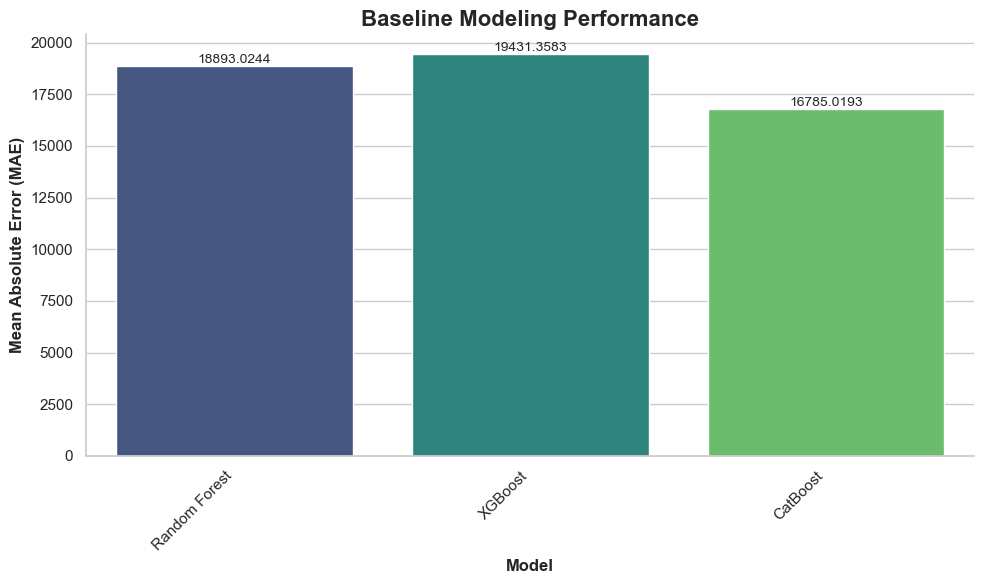

In [54]:
# Custom model names and MAE values
custom_model_names = ['Random Forest', 'XGBoost', 'CatBoost']
model_mae_values = list(baseline_model_mae.values())

# Set plot style
sns.set(style='whitegrid')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar plot
sns.barplot(x=custom_model_names, y=model_mae_values, palette='viridis', ax=ax)

# Set plot title and labels
ax.set_title('Baseline Modeling Performance', fontsize=16, fontweight='bold')
ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Mean Absolute Error (MAE)', fontweight='bold')

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add data labels on top of bars
for i, v in enumerate(model_mae_values):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', va='bottom', fontsize=10)

# Remove spines
sns.despine()

# Show plot
plt.tight_layout()
plt.show()

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X_df, y,
                                                     test_size=0.2, 
                                                     random_state=5)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1168, 77), (292, 77), (1168,), (292,))

## Hyperparameter Tuning

### 1. RandomForest

> ***In Random Forest, `bootstrap` means sampling data with replacement to create multiple subsets from the original dataset. Each subset has the same size as the original data but may contain duplicates and exclude some instances. It helps build diverse decision trees, reducing overfitting.***

1. **n_estimators:** The number of trees in the forest.
2. **max_depth:** The maximum depth of the trees.
3. **min_samples_split:** The minimum number of samples required to split an internal node.
4. **min_samples_leaf:** The minimum number of samples required to be at a leaf node.
5. **max_features:** The number of features to consider when looking for the best split.
6. **bootstrap:** Whether to bootstrap samples when building trees.
7. **random_state:** Seed for random number generation, for reproducibility.

In [56]:
rf_param = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [5]
}

rf_gridcv = GridSearchCV(RandomForestRegressor(), 
                         param_grid=rf_param, 
                         cv=3, 
                         n_jobs=-1, 
                         scoring='neg_mean_absolute_error')

rf_gridcv.fit(X_train, y_train)

print(f"Best Parameters: {rf_gridcv.best_params_}")

rf_mae = -rf_gridcv.score(X_valid, y_valid)
print(f"RandomForest MAE: {rf_mae}")

/Users/mihirupagade/Downloads/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/mihirupagade/Downloads/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/mihirupagade/Downloads/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 5}
RandomForest MAE: 16664.40285388128


### 2. XGBoost

1. **learning_rate:** The step size shrinkage used in update to prevent overfitting. Range: [0, 1].
2. **n_estimators:** Number of boosting rounds.
3. **max_depth:** Maximum depth of a tree. Higher values can lead to overfitting.
4. **min_child_weight:** Minimum sum of instance weight (hessian) needed in a child.
5. **subsample:** Subsample ratio of the training instance. Range: (0, 1].
6. **colsample_bytree:** Subsample ratio of columns when constructing each tree.
7. **reg_alpha:** L1 regularization term on weights. Can be used for regularization to avoid overfitting.
8. **reg_lambda:** L2 regularization term on weights. Can be used for regularization to avoid overfitting.
9. **gamma:** Minimum loss reduction required to make a further partition on a leaf node.

In [57]:
xgb_param = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],  # Example: specify a range of values directly
    'min_child_weight': [1, 3, 5],  # Example: specify a range of values directly
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'gamma': [0, 0.1, 0.5],
    'n_estimators': [100, 200, 300],  # Example: specify a range of values directly
    'random_state': [5]
}


# Initialize RandomizedSearchCV with XGBRegressor and parameter distribution
xgb_randcv = RandomizedSearchCV(XGBRegressor(),
                                param_distributions=xgb_param,
                                scoring='neg_mean_absolute_error',
                                cv=3,
                                n_jobs=-1,
                                n_iter=300,
                                random_state=5)

# Fit the model with early stopping
xgb_randcv.fit(X_train, y_train, eval_metric="mae", eval_set=[(X_valid, y_valid)], 
               early_stopping_rounds=10, verbose=False)

xgb_mae = -xgb_randcv.best_score_
# Best parameters and best score
print("Best Parameters:", xgb_randcv.best_params_)
print("XGBoost MAE:", xgb_mae)

/Users/mihirupagade/Downloads/anaconda/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/mihirupagade/Downloads/anaconda/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/mihirupagade/Downloads/anaconda/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/mihirupagade/Downloads/anaconda/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` m

Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'random_state': 5, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
XGBoost MAE: 19180.180339322695


### 3. CatBoost

1. **learning_rate:** Controls the step size taken during optimization.
2. **n_estimators:** Determines the number of trees in the ensemble.
3. **max_depth:** Specifies the maximum depth of each tree.
4. **l2_leaf_reg:** Adds L2 regularization to leaf weights.
5. **subsample:** Fraction of training instances used for building each tree.
6. **colsample_bylevel:** Fraction of features considered at each tree level.
7. **bagging_temperature:** Adjusts randomness in sampling during training.

In [58]:
cb_param = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 5, 6],
    'n_estimators': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'random_seed': [5]
}

# Initialize RandomizedSearchCV with CatBoostRegressor and parameter distributions
cb_gridcv = GridSearchCV(CatBoostRegressor(verbose=False, loss_function='MAE'), 
                               param_grid=cb_param,
                               scoring='neg_mean_absolute_error', 
                               cv=3, 
                               n_jobs=-1)

# Fit the model
cb_gridcv.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=10)

cb_mae = -cb_gridcv.best_score_

# Best parameters and best score
print("Best Parameters:", cb_gridcv.best_params_)
print("CatBoost MAE:", cb_mae)

Best Parameters: {'bagging_temperature': 0.0, 'depth': 6, 'l2_leaf_reg': 5, 'learning_rate': 0.05, 'n_estimators': 300, 'random_seed': 5}
CatBoost MAE: 18931.22256867973


In [59]:
model_mae = {
    "RandomForest": rf_mae,
    "XGBoost": xgb_mae,
    "CatBoost": cb_mae
}

model_mae

{'RandomForest': 16664.40285388128,
 'XGBoost': 19180.180339322695,
 'CatBoost': 18931.22256867973}

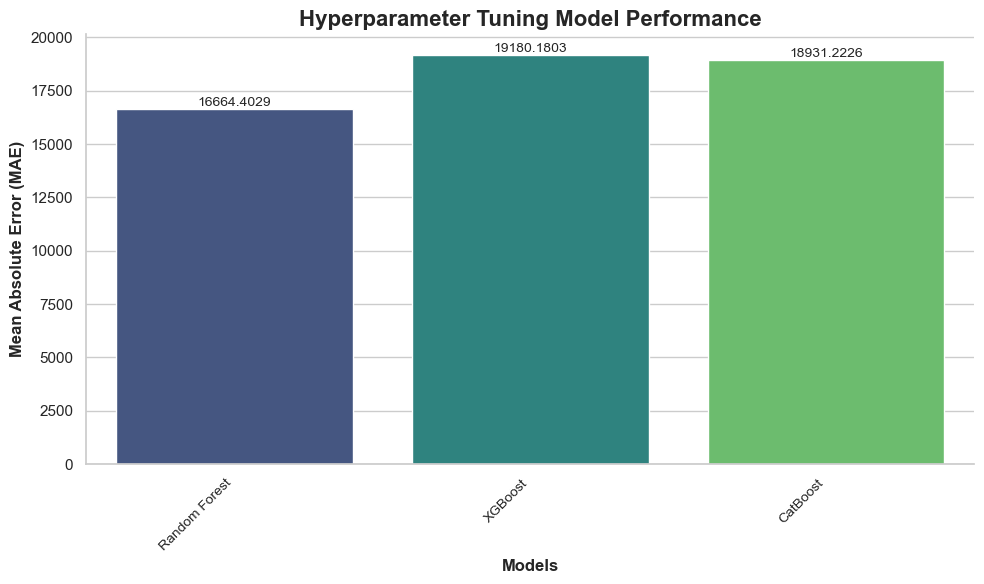

In [60]:
# Custom model names and MAE values
custom_model_names = ['Random Forest', 'XGBoost', 'CatBoost']
model_mae_values = list(model_mae.values())

# Set plot style and size
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Plot the bar plot
sns.barplot(x=custom_model_names, y=model_mae_values, palette='viridis')

# Set labels and title with increased font size
plt.xlabel("Models", fontweight='bold', fontsize=12)
plt.ylabel("Mean Absolute Error (MAE)", fontweight='bold', fontsize=12)
plt.title("Hyperparameter Tuning Model Performance", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add data labels on top of bars
for i, v in enumerate(model_mae_values):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', va='bottom', fontsize=10)

# Remove spines
sns.despine()

# Show plot
plt.tight_layout()
plt.show()

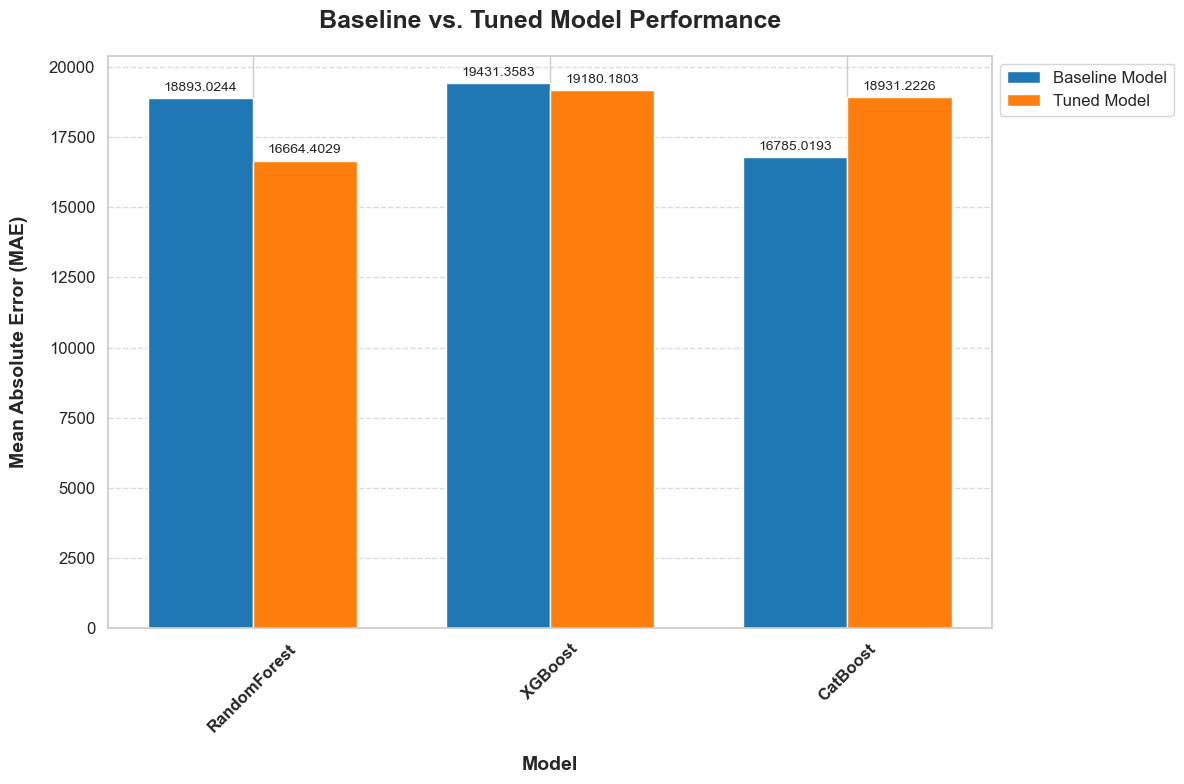

In [61]:
# Define data
models = list(model_mae.keys())
baseline_scores = list(baseline_model_mae.values())
tuning_scores = list(model_mae.values())

# Set the width of the bars
bar_width = 0.35

# Set the x locations for the groups
index = np.arange(len(models))

# Create the figure and axis objects
plt.figure(figsize=(12, 8))

# Plot the bars for baseline modeling scores
bars1 = plt.bar(index, baseline_scores, bar_width, label='Baseline Model', color='#1f77b4')

# Plot the bars for hyperparameter tuning scores
bars2 = plt.bar(index + bar_width, tuning_scores, bar_width, label='Tuned Model', color='#ff7f0e')

# Set labels and title
plt.xlabel('Model', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14, fontweight='bold', labelpad=15)
plt.title('Baseline vs. Tuned Model Performance', fontsize=18, fontweight='bold', pad=20)
plt.xticks(index + bar_width / 2, models, rotation=45, ha='center', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Add numbers on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

***Based on the visualization, it's evident that `RandomForestRegressor` performed exceptionally well after hyperparameter tuning. Let's proceed with using this model along with the best hyperparameters for our predictions.***

In [62]:
best_model = rf_gridcv.best_estimator_
dump(best_model, "best_model.sav")

['best_model.sav']

## Testing Dataset

In [63]:
data_test=pd.read_csv('House.csv')

In [64]:
categorical_features(data_test)

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [65]:
numerical_features(data_test)

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [66]:
cat_drop_missing_data(data_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [67]:
cat_drop_missing_data(data_test).columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

In [68]:
cat_fill_missing_data(data_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [69]:
num_fill_missing_data(data_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [70]:
include_age(data_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,WD,Normal,175000,8
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,WD,Normal,210000,32
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,WD,Normal,266500,69
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,WD,Normal,142125,60


In [71]:
categorical_features(data_test)

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [72]:
updated_test_data = pd.DataFrame()
select_columns(updated_test_data, data_test, top20)

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,GarageCars,GarageArea,LotArea,TotRmsAbvGrd,Age,Neighborhood,YearRemodAdd,MasVnrArea,BsmtUnfSF,FullBath,LotFrontage,WoodDeckSF,GarageYrBlt,GarageType
0,7,1710,856,854,706,856,2,548,8450,8,5,CollgCr,2003,196.0,150,2,65.0,0,2003.0,Attchd
1,6,1262,1262,0,978,1262,2,460,9600,6,31,Veenker,1976,0.0,284,2,80.0,298,1976.0,Attchd
2,7,1786,920,866,486,920,2,608,11250,6,7,CollgCr,2002,162.0,434,2,68.0,0,2001.0,Attchd
3,7,1717,756,756,216,961,3,642,9550,7,91,Crawfor,1970,0.0,540,1,60.0,0,1998.0,Detchd
4,8,2198,1145,1053,655,1145,3,836,14260,9,8,NoRidge,2000,350.0,490,2,84.0,192,2000.0,Attchd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953,694,0,953,2,460,7917,7,8,Gilbert,2000,0.0,953,2,62.0,0,1999.0,Attchd
1456,6,2073,1542,0,790,2073,2,500,13175,7,32,NWAmes,1988,119.0,589,2,85.0,349,1978.0,Attchd
1457,7,2340,1152,1152,275,1188,1,252,9042,9,69,Crawfor,2006,0.0,877,2,66.0,0,1941.0,Attchd
1458,5,1078,1078,0,49,1078,1,240,9717,5,60,NAmes,1996,0.0,0,1,68.0,366,1950.0,Attchd


In [73]:
updated_test_data

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,GarageCars,GarageArea,LotArea,TotRmsAbvGrd,Age,Neighborhood,YearRemodAdd,MasVnrArea,BsmtUnfSF,FullBath,LotFrontage,WoodDeckSF,GarageYrBlt,GarageType
0,7,1710,856,854,706,856,2,548,8450,8,5,CollgCr,2003,196.0,150,2,65.0,0,2003.0,Attchd
1,6,1262,1262,0,978,1262,2,460,9600,6,31,Veenker,1976,0.0,284,2,80.0,298,1976.0,Attchd
2,7,1786,920,866,486,920,2,608,11250,6,7,CollgCr,2002,162.0,434,2,68.0,0,2001.0,Attchd
3,7,1717,756,756,216,961,3,642,9550,7,91,Crawfor,1970,0.0,540,1,60.0,0,1998.0,Detchd
4,8,2198,1145,1053,655,1145,3,836,14260,9,8,NoRidge,2000,350.0,490,2,84.0,192,2000.0,Attchd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953,694,0,953,2,460,7917,7,8,Gilbert,2000,0.0,953,2,62.0,0,1999.0,Attchd
1456,6,2073,1542,0,790,2073,2,500,13175,7,32,NWAmes,1988,119.0,589,2,85.0,349,1978.0,Attchd
1457,7,2340,1152,1152,275,1188,1,252,9042,9,69,Crawfor,2006,0.0,877,2,66.0,0,1941.0,Attchd
1458,5,1078,1078,0,49,1078,1,240,9717,5,60,NAmes,1996,0.0,0,1,68.0,366,1950.0,Attchd


In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   TotalBsmtSF   1460 non-null   int64  
 3   2ndFlrSF      1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   LotArea       1460 non-null   int64  
 9   TotRmsAbvGrd  1460 non-null   int64  
 10  Age           1460 non-null   int64  
 11  Neighborhood  1460 non-null   object 
 12  YearRemodAdd  1460 non-null   int64  
 13  MasVnrArea    1460 non-null   float64
 14  BsmtUnfSF     1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  LotFrontage   1460 non-null   float64
 17  WoodDeckSF    1460 non-null   int64  
 18  GarageYrBlt   1460 non-null 

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   TotalBsmtSF   1460 non-null   int64  
 3   2ndFlrSF      1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   LotArea       1460 non-null   int64  
 9   TotRmsAbvGrd  1460 non-null   int64  
 10  Age           1460 non-null   int64  
 11  Neighborhood  1460 non-null   object 
 12  YearRemodAdd  1460 non-null   int64  
 13  MasVnrArea    1460 non-null   float64
 14  BsmtUnfSF     1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  LotFrontage   1460 non-null   float64
 17  WoodDeckSF    1460 non-null   int64  
 18  GarageYrBlt   1460 non-null 

In [76]:
updated_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   TotalBsmtSF   1460 non-null   int64  
 3   2ndFlrSF      1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   LotArea       1460 non-null   int64  
 9   TotRmsAbvGrd  1460 non-null   int64  
 10  Age           1460 non-null   int64  
 11  Neighborhood  1460 non-null   object 
 12  YearRemodAdd  1460 non-null   int64  
 13  MasVnrArea    1460 non-null   float64
 14  BsmtUnfSF     1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  LotFrontage   1460 non-null   float64
 17  WoodDeckSF    1460 non-null   int64  
 18  GarageYrBlt   1460 non-null 

In [77]:
categorical_features(updated_test_data)

['OverallQual',
 'GarageCars',
 'TotRmsAbvGrd',
 'Neighborhood',
 'FullBath',
 'GarageType']

In [78]:
categorical_features(X)

['OverallQual',
 'GarageCars',
 'TotRmsAbvGrd',
 'Neighborhood',
 'FullBath',
 'GarageType']

In [79]:
X

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,GarageCars,GarageArea,LotArea,TotRmsAbvGrd,Age,Neighborhood,YearRemodAdd,MasVnrArea,BsmtUnfSF,FullBath,LotFrontage,WoodDeckSF,GarageYrBlt,GarageType
0,7,1710,856,854,706,856,2,548,8450,8,5,CollgCr,2003,196.0,150,2,65.0,0,2003.0,Attchd
1,6,1262,1262,0,978,1262,2,460,9600,6,31,Veenker,1976,0.0,284,2,80.0,298,1976.0,Attchd
2,7,1786,920,866,486,920,2,608,11250,6,7,CollgCr,2002,162.0,434,2,68.0,0,2001.0,Attchd
3,7,1717,756,756,216,961,3,642,9550,7,91,Crawfor,1970,0.0,540,1,60.0,0,1998.0,Detchd
4,8,2198,1145,1053,655,1145,3,836,14260,9,8,NoRidge,2000,350.0,490,2,84.0,192,2000.0,Attchd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953,694,0,953,2,460,7917,7,8,Gilbert,2000,0.0,953,2,62.0,0,1999.0,Attchd
1456,6,2073,1542,0,790,2073,2,500,13175,7,32,NWAmes,1988,119.0,589,2,85.0,349,1978.0,Attchd
1457,7,2340,1152,1152,275,1188,1,252,9042,9,69,Crawfor,2006,0.0,877,2,66.0,0,1941.0,Attchd
1458,5,1078,1078,0,49,1078,1,240,9717,5,60,NAmes,1996,0.0,0,1,68.0,366,1950.0,Attchd


In [80]:
updated_test_data

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,GarageCars,GarageArea,LotArea,TotRmsAbvGrd,Age,Neighborhood,YearRemodAdd,MasVnrArea,BsmtUnfSF,FullBath,LotFrontage,WoodDeckSF,GarageYrBlt,GarageType
0,7,1710,856,854,706,856,2,548,8450,8,5,CollgCr,2003,196.0,150,2,65.0,0,2003.0,Attchd
1,6,1262,1262,0,978,1262,2,460,9600,6,31,Veenker,1976,0.0,284,2,80.0,298,1976.0,Attchd
2,7,1786,920,866,486,920,2,608,11250,6,7,CollgCr,2002,162.0,434,2,68.0,0,2001.0,Attchd
3,7,1717,756,756,216,961,3,642,9550,7,91,Crawfor,1970,0.0,540,1,60.0,0,1998.0,Detchd
4,8,2198,1145,1053,655,1145,3,836,14260,9,8,NoRidge,2000,350.0,490,2,84.0,192,2000.0,Attchd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953,694,0,953,2,460,7917,7,8,Gilbert,2000,0.0,953,2,62.0,0,1999.0,Attchd
1456,6,2073,1542,0,790,2073,2,500,13175,7,32,NWAmes,1988,119.0,589,2,85.0,349,1978.0,Attchd
1457,7,2340,1152,1152,275,1188,1,252,9042,9,69,Crawfor,2006,0.0,877,2,66.0,0,1941.0,Attchd
1458,5,1078,1078,0,49,1078,1,240,9717,5,60,NAmes,1996,0.0,0,1,68.0,366,1950.0,Attchd


### Handling Additional Categories in Categorical Features

The following steps were taken to handle additional categories present in some categorical features of the testing data (`updated_test_data`) that were not present in the training data (`X`):

1. **Identifying Additional Categories**: 
   - First, we identified the categorical features and compared their unique categories between the training and testing data. 
   - Features such as `GarageCars`, `TotRmsAbvGrd`, and `FullBath` were found to have additional categories in the testing data compared to the training data.

2. **Handling Additional Categories**:
   - **GarageCars**: 
     - We replaced the additional categories `'missing'` and `5.0` with appropriate values (`2.0` and `4.0`, respectively). 
     - This was done to ensure consistency and compatibility with the training data.
   - **TotRmsAbvGrd**: 
     - We replaced the additional categories `13` and `15` with a common value `12`. 
     - This simplification helps maintain consistency in the feature across training and testing data.
   - **FullBath**: 
     - We replaced the additional category `4` with the value `3`. 
     - Similar to the other features, this ensures consistency in the categories between training and testing data.

3. **Reasoning**:
   - The reason for this preprocessing is to ensure that the testing data conforms to the same format and categories as the training data.
   - Machine learning models are trained on the training data and make predictions based on patterns learned during training. 
   - If the testing data contains categories not seen during training, it can lead to errors or inconsistencies in predictions. 
   - Therefore, by handling the additional categories in the testing data, we ensure that the model can make accurate predictions when deployed on new, unseen data.


In [81]:
for i in categorical_features(X):
    print(i, X[i].nunique())

OverallQual 10
GarageCars 5
TotRmsAbvGrd 12
Neighborhood 25
FullBath 4
GarageType 7


In [82]:
for i in categorical_features(updated_test_data):
    print(i, updated_test_data[i].nunique())

OverallQual 10
GarageCars 5
TotRmsAbvGrd 12
Neighborhood 25
FullBath 4
GarageType 7


In [83]:
# Get the list of categorical features
categorical_features_train = categorical_features(X)
categorical_features_test = categorical_features(updated_test_data)

# Iterate through each categorical feature and compare unique categories
for feature in categorical_features_train:
    unique_categories_train = set(X[feature].unique())
    unique_categories_test = set(updated_test_data[feature].unique())
    
    additional_categories = unique_categories_test - unique_categories_train
    
    if additional_categories:
        print(f"Additional categories in '{feature}': {additional_categories}")

In [84]:
X['GarageCars'].value_counts()

GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

In [85]:
updated_test_data['GarageCars'].value_counts()

GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

In [86]:
X['TotRmsAbvGrd'].value_counts()

TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

In [87]:
updated_test_data['TotRmsAbvGrd'].value_counts()

TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

In [88]:
X['FullBath'].value_counts()

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

In [89]:
updated_test_data['FullBath'].value_counts()

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

In [90]:
# For GarageCars
updated_test_data['GarageCars'] = updated_test_data['GarageCars'].replace('missing', 2.0)
updated_test_data['GarageCars'] = updated_test_data['GarageCars'].replace(5.0, 4.0)

# For TotRmsAbvGrd
updated_test_data['TotRmsAbvGrd'] = updated_test_data['TotRmsAbvGrd'].replace({13: 12, 15: 12})

# For FullBath
updated_test_data['FullBath'] = updated_test_data['FullBath'].replace(4, 3)

In [91]:
X['GarageCars'].value_counts()

GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

In [92]:
updated_test_data['GarageCars'].value_counts()

GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

In [93]:
X['TotRmsAbvGrd'].value_counts()

TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

In [94]:
updated_test_data['TotRmsAbvGrd'].value_counts()

TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

In [95]:
X['FullBath'].value_counts()

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

In [96]:
updated_test_data['FullBath'].value_counts()

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

In [97]:
def transform_data(transformer, data):
    """
    Transform the input data using the specified transformer and return a DataFrame.

    Parameters:
    transformer (ColumnTransformer): The fitted ColumnTransformer object.
    data (DataFrame): The input data to be transformed.

    Returns:
    DataFrame: Transformed data as a DataFrame.
    """
    # Transform the input data using the specified transformer
    transform_X = transformer.transform(data).toarray()
    
    # Create a DataFrame from the transformed data
    transformed_df = pd.DataFrame(transform_X)
    
    return transformed_df

In [98]:
# Transform updated_test_data
updated_test_data_df = transform_data(transformer, updated_test_data)
updated_test_data_df

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,856.0,548.0,8450.0,5.0,2003.0,196.0,150.0,65.0,0.0,2003.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1262.0,460.0,9600.0,31.0,1976.0,0.0,284.0,80.0,298.0,1976.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,920.0,608.0,11250.0,7.0,2002.0,162.0,434.0,68.0,0.0,2001.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,961.0,642.0,9550.0,91.0,1970.0,0.0,540.0,60.0,0.0,1998.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1145.0,836.0,14260.0,8.0,2000.0,350.0,490.0,84.0,192.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,953.0,460.0,7917.0,8.0,2000.0,0.0,953.0,62.0,0.0,1999.0
1456,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2073.0,500.0,13175.0,32.0,1988.0,119.0,589.0,85.0,349.0,1978.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1188.0,252.0,9042.0,69.0,2006.0,0.0,877.0,66.0,0.0,1941.0
1458,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1078.0,240.0,9717.0,60.0,1996.0,0.0,0.0,68.0,366.0,1950.0


In [99]:
baseline_model_mae

{'RandomForest': 18893.0243539658,
 'XGBoost': 19431.35826514398,
 'CatBoost': 16785.0193211438}

In [100]:
model_mae

{'RandomForest': 16664.40285388128,
 'XGBoost': 19180.180339322695,
 'CatBoost': 18931.22256867973}

## Target prediction

In [101]:
best_model

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=150,
                      random_state=5)

585:	learn: 10640.8532706	total: 1.7s	remaining: 1.2s
586:	learn: 10628.0540779	total: 1.7s	remaining: 1.2s
587:	learn: 10608.6705479	total: 1.7s	remaining: 1.19s
588:	learn: 10597.0683401	total: 1.71s	remaining: 1.19s
589:	learn: 10595.3486832	total: 1.71s	remaining: 1.19s
590:	learn: 10593.3723708	total: 1.71s	remaining: 1.18s
591:	learn: 10576.3584831	total: 1.71s	remaining: 1.18s
592:	learn: 10565.3570607	total: 1.72s	remaining: 1.18s
593:	learn: 10547.7847808	total: 1.72s	remaining: 1.18s
594:	learn: 10536.0999939	total: 1.73s	remaining: 1.17s
595:	learn: 10534.2292967	total: 1.73s	remaining: 1.17s
596:	learn: 10528.5102489	total: 1.73s	remaining: 1.17s
597:	learn: 10517.9786046	total: 1.73s	remaining: 1.17s
598:	learn: 10494.0906161	total: 1.74s	remaining: 1.16s
599:	learn: 10478.0230869	total: 1.74s	remaining: 1.16s
600:	learn: 10472.7754371	total: 1.74s	remaining: 1.16s
601:	learn: 10443.8834789	total: 1.75s	remaining: 1.16s
602:	learn: 10442.2425053	total: 1.75s	remaining: 1.1

In [99]:
test_preds = best_model.predict(updated_test_data_df)
test_preds = pd.DataFrame(test_preds, columns=['SalePrice'])
test_preds

,SalePrice
0,208500.000000
1,181500.000000
2,223500.000000
3,155874.080000
4,250000.000000
...,...
1455,179128.880000
1456,210000.000000
1457,266500.000000
1458,142125.000000


## Sample Submission

In [100]:
submission = pd.concat([data_test['Id'], test_preds], axis=1)
submission

,Id,SalePrice
0,1,208500.000000
1,2,181500.000000
2,3,223500.000000
3,4,155874.080000
4,5,250000.000000
...,...,...
1455,1456,179128.880000
1456,1457,210000.000000
1457,1458,266500.000000
1458,1459,142125.000000


## Business Case

### Introduction:

 One area that caught my interest is predicting housing prices. With the housing market constantly changing, having a reliable way to estimate property values is crucial for both buyers and sellers. In this project, I aim to develop a simple yet effective model that predicts housing prices accurately.

### Problem Statement:

Buying or selling a house can be stressful, mainly because it's challenging to know if the price is fair. Traditional methods of determining property values often rely on subjective assessments or outdated information. This leads to uncertainty and can result in people either overpaying or selling for less than their home's worth.

### Proposed Solution:

My solution involves building a housing price prediction model using ML techniques. By analyzing factors such as location, size, number of bedrooms, and historical sales data, the model will provide estimates of property values. This will help buyers and sellers make more informed decisions and negotiate better deals.
